Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.WBCD1E_1.0.0/pneumonia_mnist-train.tfrecord*...…

Generating val examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.WBCD1E_1.0.0/pneumonia_mnist-val.tfrecord*...: …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.WBCD1E_1.0.0/pneumonia_mnist-test.tfrecord*...:…

Dataset pneumonia_mnist downloaded and prepared to /root/tensorflow_datasets/pneumonia_mnist/1.0.0. Subsequent calls will reuse this data.

Processing and saving images to pneumoniamnist_dataset...


Saving train set:   0%|          | 0/4708 [00:00<?, ?it/s]/tmp/ipython-input-268801112.py:53: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(image_array, mode='L')
Saving test set: 100%|██████████| 624/624 [00:00<00:00, 775.49it/s]


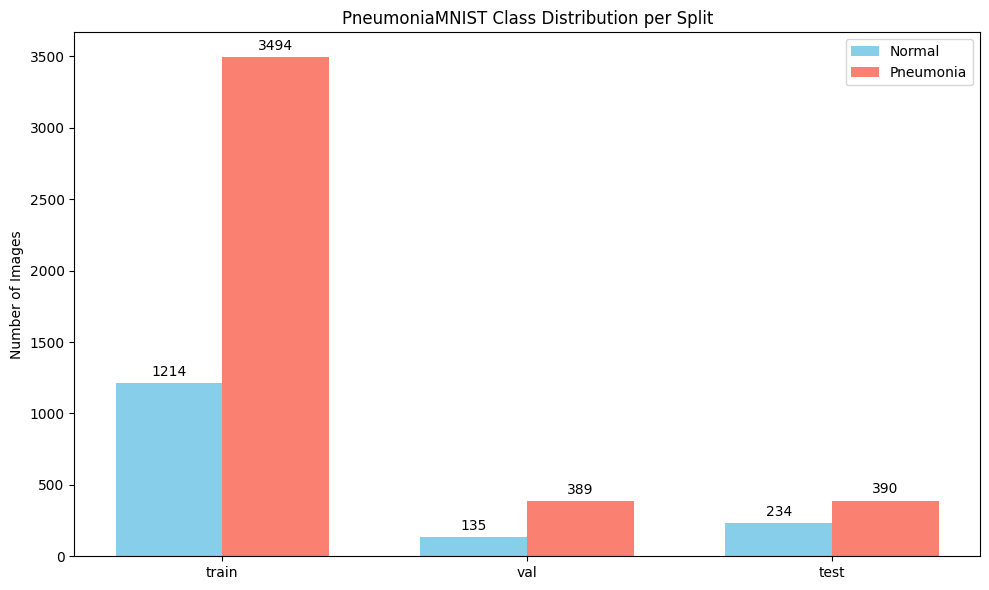

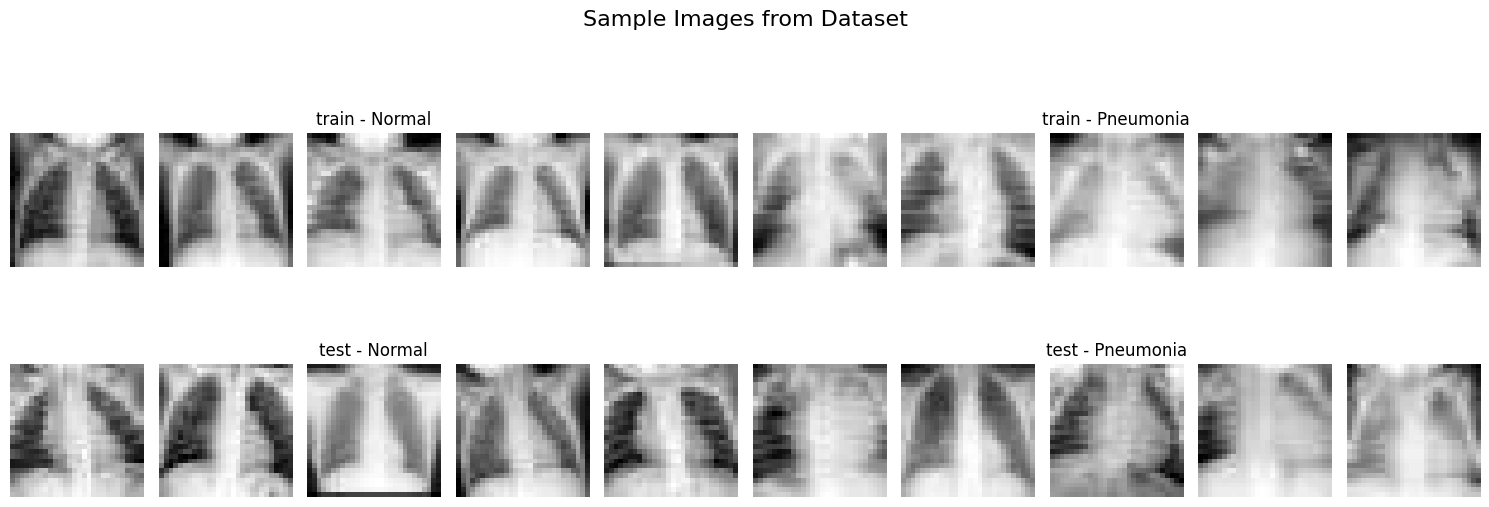


Dataset is ready at: /content/pneumoniamnist_dataset


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image
from tqdm import tqdm

def prepare_pneumoniamnist_data():
    # 1. Load the dataset from TensorFlow Datasets
    print("Downloading PneumoniaMNIST...")
    ds, info = tfds.load('pneumonia_mnist', with_info=True, as_supervised=True)

    # Define class names based on documentation (0=Normal, 1=Pneumonia)
    class_names = {0: 'Normal', 1: 'Pneumonia'}

    # Define splits to process
    splits = ['train', 'val', 'test']

    # Root directory for saving images
    base_dir = 'pneumoniamnist_dataset'

    # Dictionaries to store counts for plotting later
    stats = {split: {'Normal': 0, 'Pneumonia': 0} for split in splits}

    print(f"\nProcessing and saving images to {base_dir}...")

    for split in splits:
        # Create directories: dataset/train/Normal, dataset/train/Pneumonia, etc.
        for label_code, label_name in class_names.items():
            os.makedirs(os.path.join(base_dir, split, label_name), exist_ok=True)

        # Iterate through the TFDS dataset
        # We use standard 'val' key as shown in your screenshot, but TFDS often uses 'validation'
        # Adjusting key if necessary based on your screenshot showing 'val'
        tfds_split_name = 'validation' if split == 'val' and 'validation' in ds else split

        dataset_iterator = ds[tfds_split_name]

        for i, (image_tensor, label_tensor) in tqdm(enumerate(dataset_iterator),
                                                    desc=f"Saving {split} set",
                                                    total=info.splits[tfds_split_name].num_examples):

            label_code = label_tensor.numpy()
            label_name = class_names[label_code]

            # Convert tensor to PIL Image
            # The image is 28x28x1 (grayscale), we convert to 'L' mode
            image_array = image_tensor.numpy()
            if image_array.shape[-1] == 1:
                image_array = image_array.squeeze()

            img = Image.fromarray(image_array, mode='L')

            # Save image
            filename = f"{label_name}_{i}.png"
            save_path = os.path.join(base_dir, split, label_name, filename)
            img.save(save_path)

            # Update stats
            stats[split][label_name] += 1

    return stats, base_dir

def plot_data_distribution(stats):
    splits = list(stats.keys())
    normal_counts = [stats[s]['Normal'] for s in splits]
    pneumonia_counts = [stats[s]['Pneumonia'] for s in splits]

    x = np.arange(len(splits))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, normal_counts, width, label='Normal', color='skyblue')
    rects2 = ax.bar(x + width/2, pneumonia_counts, width, label='Pneumonia', color='salmon')

    ax.set_ylabel('Number of Images')
    ax.set_title('PneumoniaMNIST Class Distribution per Split')
    ax.set_xticks(x)
    ax.set_xticklabels(splits)
    ax.legend()

    # Add counts on top of bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    plt.tight_layout()
    plt.show()

def display_samples(base_dir):
    splits = ['train', 'test']
    classes = ['Normal', 'Pneumonia']

    fig, axes = plt.subplots(len(splits), len(classes) * 5, figsize=(15, 6))
    plt.suptitle("Sample Images from Dataset", fontsize=16)

    for row_idx, split in enumerate(splits):
        col_idx = 0
        for cls in classes:
            folder_path = os.path.join(base_dir, split, cls)
            images = os.listdir(folder_path)[:5] # Take first 5 images

            for img_name in images:
                img_path = os.path.join(folder_path, img_name)
                img = Image.open(img_path)

                ax = axes[row_idx, col_idx]
                ax.imshow(img, cmap='gray')
                ax.axis('off')
                if col_idx % 5 == 2: # Title only on the middle image of the group
                    ax.set_title(f"{split} - {cls}")
                col_idx += 1
    plt.tight_layout()
    plt.show()

# --- EXECUTION ---
# 1. Download and Save
stats, dataset_path = prepare_pneumoniamnist_data()

# 2. Plot Counts
plot_data_distribution(stats)

# 3. Display Samples
display_samples(dataset_path)

print(f"\nDataset is ready at: {os.path.abspath(dataset_path)}")